In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [27]:
data = pd.read_csv("C:\\Users\\abarr\\Desktop\\Thecleverprogrammer.csv")
print(data.head(5))


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [29]:
#
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


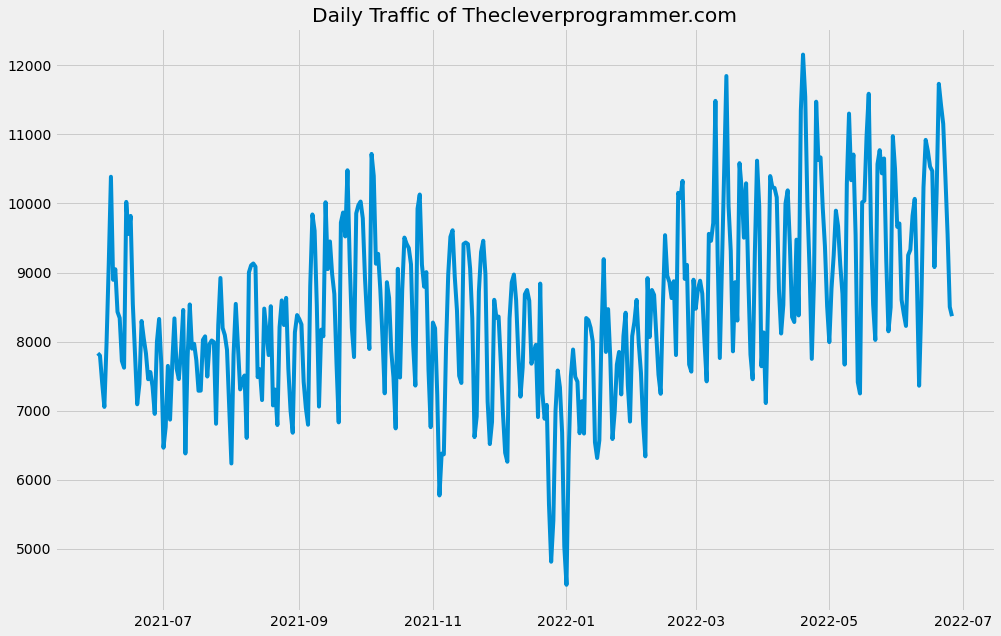

In [30]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 432x288 with 0 Axes>

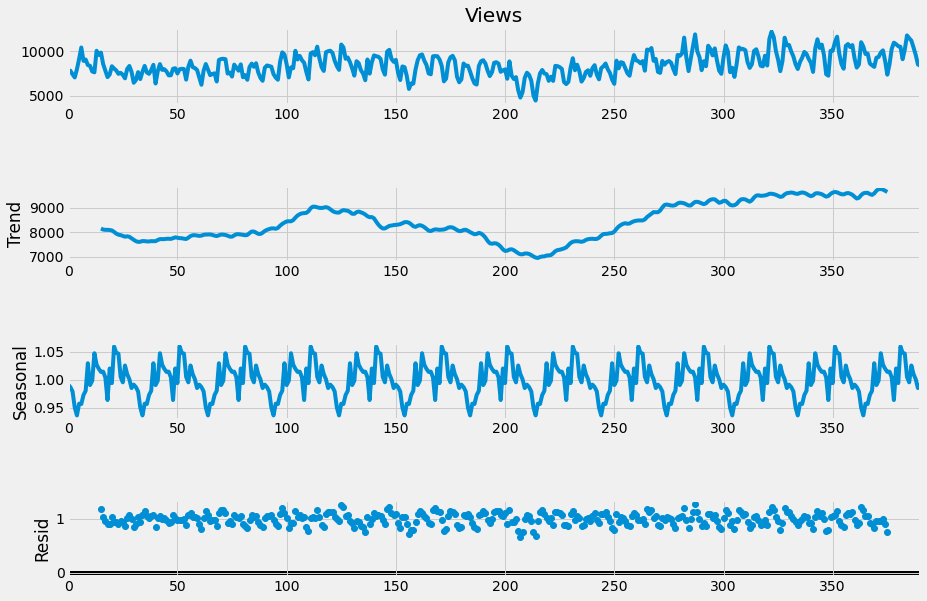

In [48]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', period=30)
                            
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10);

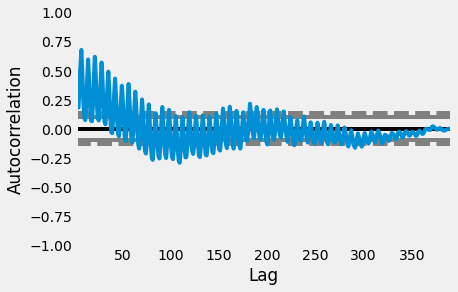

In [42]:
pd.plotting.autocorrelation_plot(data["Views"]);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


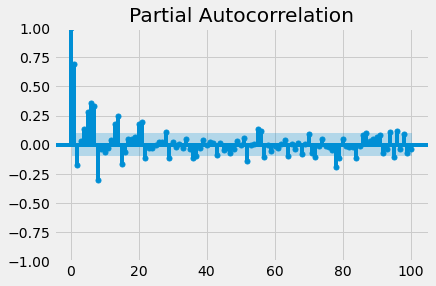

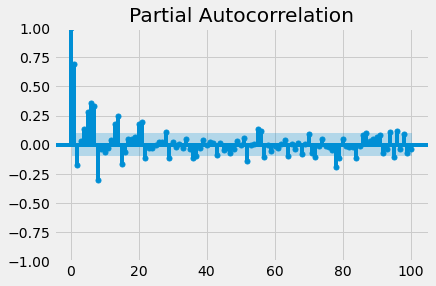

In [46]:
plot_pacf(data["Views"], lags = 100)

In [49]:
#Statespace Model Results
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.969
Date:                            Wed, 13 Jul 2022   AIC                           6227.939
Time:                                    13:59:40   BIC                           6286.962
Sample:                                         0   HQIC                          6251.364
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7612      0.130      5.859      0.000       0.507       1.016
ar.L2         -0.7760      0.134   

In [50]:
#Traffic forecast for the next 50 days
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9923.379982
392    10804.589765
393    10773.256132
394     9868.675925
395     8795.340438
396     8279.177792
397     8975.560497
398     9737.353623
399    10315.302555
400    10639.919565
401     9869.437523
402     9294.475083
403     8992.304789
404     9101.387095
405    10529.002075
406    11002.691334
407    10911.393157
408    10059.962047
409     9383.019441
410     8604.556598
411     9204.315317
412    10380.026352
413    10620.930771
414    10790.820641
415    10235.228072
416     9374.940033
417     8980.394700
418     9177.029252
419     9928.164883
420    10271.757867
421    10734.496120
422     9867.305290
423     9454.665675
424     9004.276963
425     8877.885362
426    10198.425575
427    10891.655930
428    10916.052842
429    10359.898381
430     9382.341579
431     8692.224065
432     8771.630812
433    10123.754657
434    10572.566797
435    10872.817872
436    10412.141417
437     9257.349210
438     9132.068388
439     9384.900075
440    10348.734855


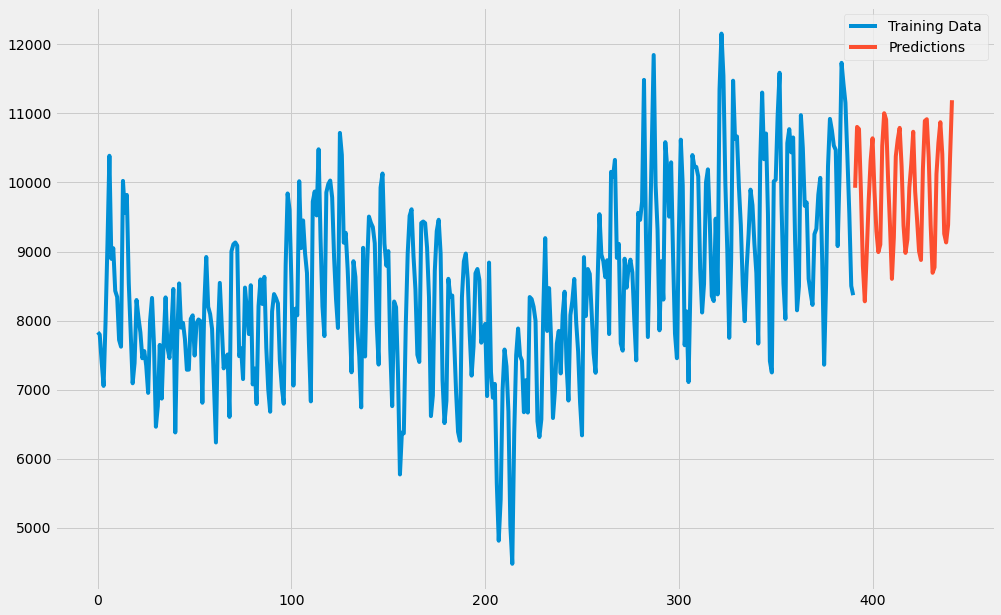

In [52]:
#Plotting Predictions

data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions");